# Boston housing Data

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
import pandas as pd
bos = pd.DataFrame(boston.data)
print(bos.head())

(506, 13)
        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


# Train Test split and Standardization

In [2]:
bos['PRICE'] = boston.target

x = bos.drop('PRICE', axis = 1)
y = bos['PRICE']

In [4]:
#from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [5]:
import numpy as np
np.set_printoptions(suppress=True)
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [6]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
std = StandardScaler(with_mean=True,with_std=True)
std_vocab = std.fit(x_train)
standardized_train = std.transform(x_train)
standardized_test = std.transform(x_test)
print("The type of standard_train is ",type(standardized_train))
print("The type of standard_test is ",type(standardized_test))
print("The shape of standard_train is ",standardized_train.shape)
print("The shape of standard_test is ",standardized_test.shape)

The type of standard_train is  <class 'numpy.ndarray'>
The type of standard_test is  <class 'numpy.ndarray'>
The shape of standard_train is  (354, 13)
The shape of standard_test is  (152, 13)


# Linear Regression implementation

In [114]:
from sklearn.metrics.pairwise import euclidean_distances
def sgd(x_train,learning_rate):
    wj = np.random.normal(0,1,len(x_train[0])) #Initial weight vector
    bj = np.random.normal(0,1) #Initial intercept term
    t=0
    g=0
    a=0
    r=learning_rate
    while a>=0: #Runs the loop until difference in weight vectors become zero
        n = np.random.randint(2,354) #Value of k, it changes every iteration
        x_i=0
        y_i=0
        t=0
        g=0
        for k in range(1,n+1):
            x_i=x_train[k] #Gets vector value for x1 initially, will become x2 in the next loop
            y_i=y_train[k] #Gets vector value for y1 initially
            t+=(y_i-wj@x_i-bj)*x_i #Keep adding (y1-w1*x1-b1)*x1 o the next term, basically performs summation
            g+=(y_i-wj@x_i-bj)
        dl_dw=(-2/n)*t #Derivative term
        dl_db=(-2/n)*g
        wf=wj-r*(dl_dw) #Update function for weight
        bf=bj-r*(dl_db) #Update function for intercept
        if (wf==wj).all() and bf==bj: #Terminates the function if the weights become equal
            optimal_w = wf
            optimal_b = bf
            break
        wj = wf #Updating the wj term for the next iteration
        bj = bf
        r=r*0.95
        a+=1 #Counts the number of iterations
    print('Total number of iterations are',a)
    return optimal_w,optimal_b

q,p=sgd(standardized_train,0.18)
print("The weight vector is",q)
print("The intercept term is",p)

Total number of iterations are 670
The weight vector is [-1.0449877   0.7533348   0.08631821  0.32298285 -1.40564064  2.57977913
  0.47035595 -1.83830568  1.12306168 -0.30468514 -2.03766993  1.20568904
 -4.36627246]
The intercept term is 22.202349777984367


**Observations:**
The above function is manual implementation of SGD to find the weight vectors and intercept term for Linear Regression. 

# Comparing manual implementaion of SGD with Linear Regression of Sklearn

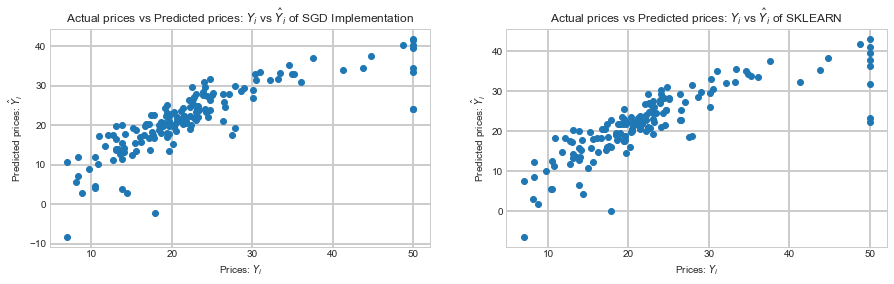

In [125]:
y_sgd=[]
for i in range(len(standardized_test)):
    y_sgd.append(standardized_test[i]@q+p) #Gets the cost at each iteration and saves it in a new list
    
import matplotlib.pyplot as plt

#Plot scatter plot of SGD Implementation
plt.figure(figsize=(15,4))

plt.subplot(121)
plt.scatter(y_test, y_sgd)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ of SGD Implementation")
plt.grid(linestyle='-', linewidth=2)

#Plot scatter plot of Sklearn Linear Regression

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

plt.subplot(122)
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ of SKLEARN")
plt.grid(linestyle='-', linewidth=2)
plt.show()

**Observations:**
We can see that the scatter plot for manual implementation of SGD and SKLearn is almost same.

In [3]:
from sklearn.metrics import mean_squared_error
mse_sgd = mean_squared_error(y_test,y_sgd)
mse_sklearn = mean_squared_error(y_test,y_pred)
print("Root mean square error of SGD implementation is",np.sqrt(mse_sgd))
print("Root mean square error of Sklearn is",np.sqrt(mse_sklearn))

Root mean square error of SGD implementation is 5.565065249620685
Root mean square error of Sklearn is 5.541049738742562


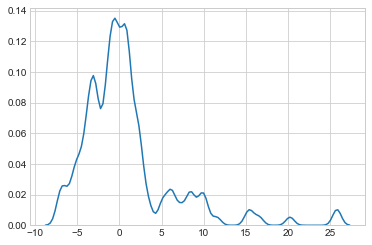

In [119]:
delta_y = y_test-y_sgd;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

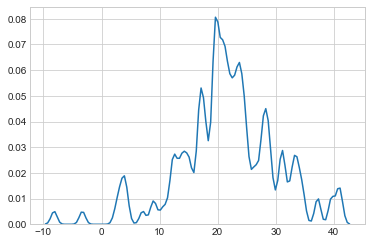

In [75]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(y_sgd), bw=0.5)
plt.show()

# Results:

1) Manual implementation of SGD seems to have a performance near similar to Sklearn's implementation.